### Ischemic stroke prediction 


In [ ]:
## Import the Libraries

%matplotlib inline
%pip install numpy
%pip install seaborn
    
# Importing the Packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import seaborn as sns
rcParams['figure.figsize'] = 10, 8

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


#### Task Overview

------------------------------------------------------------------------------------------
**Regression**
1. **Data Preparation** <span style="color:#4ea373">**[4pt]**</span>

    1.1. Load Data <span style="color:#4ea373">[0pt]</span>

    1.2. Clean Data <span style="color:#4ea373">[1pt]</span>

    1.3. Fill Missing Values <span style="color:#4ea373">[3pt]</span>

2. **Data Exploration** <span style="color:#4ea373">**[2pt]**</span>

    2.1. Correlation Heatmap <span style="color:#4ea373">[1pt]</span>

    2.2. Exploring Linear Relations <span style="color:#4ea373">[1pt]</span>

3. **Train Regression Models** <span style="color:#4ea373">**[7.5pt]**</span>

    3.1. Prepare Data for Training  <span style="color:#4ea373">[1pt]</span>

    3.2. Fit Regression Models  <span style="color:#4ea373">[2pt]</span>

    3.3. Feature Selection   <span style="color:#4ea373">[1.5pt]</span>

    3.4. Hyperparamter Tuning  <span style="color:#4ea373">[1pt]</span>

    3.5. Discretized Error Assessment  <span style="color:#4ea373">[2pt]</span>

-----------------------------------------------------------------------------------------
**Classification**
1. **Data Preparation**  <span style="color:#4ea373">**[0pt]**</span>

2. **Data Exploration**  <span style="color:#4ea373">**[1.5pt]**</span>

    2.1. Visualize the Target Label Distribution  <span style="color:#4ea373">[0.5pt]</span>

    2.2. Visualize Variance per Target Group  <span style="color:#4ea373">[1pt]</span>

3. **Train Classification Models**  <span style="color:#4ea373">**[2pt]**</span>

4. **Dealing with Data Imbalance**  <span style="color:#4ea373">**[3pt]**</span>

    4.1. Undersample Data  <span style="color:#4ea373">[1pt]</span>

    4.2. Oversample Data  <span style="color:#4ea373">[2pt]</span>





#### Regression

**Task Description**


**Dataset**

The dataset contains ____ instances ...[1].


**References:**

[1] 

#### 1. Prepare the Dataset



Before getting started with model fitting, it is always a good idea to explore the data. What data types can be found in the dataframe, what is our target variable, are there missing values or messy data formats? We will therefore start with an initial data exploration.

1.1. Load the dataset and display the first rows.

In [ ]:
# Defining header
#col=['DATE','TIME','CO_GT','PT08_S1_CO','NMHC_GT','C6H6_GT','PT08_S2_NMHC',
     #'NOX_GT','PT08_S3_NOX','NO2_GT','PT08_S4_NO2','PT08_S5_O3','T','RH','AH']


# Defining number of columns from csv
#use = list(np.arange(len(col)))

# Reading the data from csv
df = pd.read_csv('/data/processed/volumetry_table_flair.csv',
    header=None, skiprows=1, na_filter=True, na_values=-200
)


# Format date column (See: https://docs.python.org/3/library/datetime.html) always a good idea for dates
#df_air['DATE'] = pd.to_datetime(df_air.DATE, format='%m/%d/%Y')


print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   DATE          9357 non-null   datetime64[ns]
 1   TIME          9357 non-null   object        
 2   CO_GT         7674 non-null   float64       
 3   PT08_S1_CO    8991 non-null   float64       
 4   NMHC_GT       914 non-null    float64       
 5   C6H6_GT       8991 non-null   float64       
 6   PT08_S2_NMHC  8991 non-null   float64       
 7   NOX_GT        7718 non-null   float64       
 8   PT08_S3_NOX   8991 non-null   float64       
 9   NO2_GT        7715 non-null   float64       
 10  PT08_S4_NO2   8991 non-null   float64       
 11  PT08_S5_O3    8991 non-null   float64       
 12  T             8991 non-null   float64       
 13  RH            8991 non-null   float64       
 14  AH            8991 non-null   float64       
dtypes: datetime64[ns](1), float64(13), obj

1.2. Clean the dataset <span style="color:#4ea373">[1pt]</span>

Start out by applying some simple cleaning steps:

In [3]:
# 🔶 Drop all rows ONLY containing NaN (not a number) for ALL features

print(f"Shape of the dataframe before doing any changes to the rows: {df_air.shape}\n")
df_air = df_air.dropna(how='all')
# The dropna function removes any row where every column is NaN, instad of single elements, we drop all.
print(f"Shape of the dataframe after removing rows with NaN only: {df_air.shape}\n")



# 🔶 Drop ONLY with 10 or more NaN values

# First, identify the indices of rows with 10 or more missing values. axis 1 is rows 0 is columns
df_air = df_air[df_air.isnull().sum(axis=1) < 10]

print(f"Shape of the dataframe after removing rows with 10 or more NaN values: {df_air.shape}\n")


# 🔶 Check which features still contain missing values and how many values are missing

incomplete_features = df_air.columns[df_air.isnull().sum() > 0]
missing_values = df_air[incomplete_features].isnull().sum()

print("Remaining features with missing values:")
print(pd.DataFrame({'Feature': incomplete_features, 'Missing Values': missing_values}))

Shape of the dataframe before doing any changes to the rows: (9471, 15)

Shape of the dataframe after removing rows with NaN only: (9357, 15)

Shape of the dataframe after removing rows with 10 or more NaN values: (9017, 15)

Remaining features with missing values:
                   Feature  Missing Values
CO_GT                CO_GT            1647
PT08_S1_CO      PT08_S1_CO              26
NMHC_GT            NMHC_GT            8104
C6H6_GT            C6H6_GT              26
PT08_S2_NMHC  PT08_S2_NMHC              26
NOX_GT              NOX_GT            1595
PT08_S3_NOX    PT08_S3_NOX              26
NO2_GT              NO2_GT            1598
PT08_S4_NO2    PT08_S4_NO2              26
PT08_S5_O3      PT08_S5_O3              26
T                        T              26
RH                      RH              26
AH                      AH              26


1.3. Fill in the missing values <span style="color:#4ea373">[3pt]</span>

We want to keep as much data as possible, hence for the remaining NaN values we apply filling strategies rather than excluding incomplete samples.

Fill the missing values with the following strategies:

- CO_GT, NOX_GT, NO2_GT will be filled by monthly average of that particular hour
- NHHC_GT will be dropped as it has 90% missing data

In [4]:
# 🔶  Split hour from 'TIME' into new column named 'HOUR'
# df_air['HOUR'] = ...

# print(df_air.head())
# Converted the TIME column into datetim object:
time_dt = pd.to_datetime(df_air['TIME'], format='%H:%M:%S')
# I want the HOUR column to be between DATE and TIME columns
df_air.insert(1, 'HOUR', time_dt.dt.hour)
# Update the TIME column so it now shows only minutes and seconds, not hours, because we split it
df_air['TIME'] = time_dt.dt.strftime('%M:%S')
# print(df_air.head())



# 🔶 Add the 'MONTH' column to the dataset you can get the month from the 'DATE' column
# df_air['MONTH'] = ...

# Column to insert
col = df_air['DATE'].dt.month
# I want the MONTH column to be between DATE and HOUR columns
df_air.insert(1, 'MONTH', col)
# I don't have to delete the month entries out of DATE column, because we do not split
# print(df_air.head())


#drop the 'DATE' and 'TIME' columns

df_air.drop(columns=['DATE', 'TIME'], inplace=True)
# print(df_air.head())


# 🔶 Drop column NMHC_GT; it has 90% missing data

df_air.drop(columns=['NMHC_GT'], inplace=True)
# print(df_air.head())



# 🔶 Fill NaN values with monthly average of particular hour MARKED

# We group by month and hour before transforming to its mean. it's monthly average of the hour
df_air = df_air.fillna(df_air.groupby(['MONTH', 'HOUR']).transform('mean'))
print(df_air)



# 🔶 Check which features still contain missing values and how many values are missing
# same as before
incomplete_features = df_air.columns[df_air.isnull().sum() > 0]
missing_values = df_air[incomplete_features].isnull().sum()

#print("Remaining features with missing values after filling with monthly mean of particular hour:")
#print(pd.DataFrame({'Feature': incomplete_features, 'Missing Values': missing_values}))
#print()


# 🔶 Fill the remaining NaN values with hourly average value

df_air = df_air.fillna(df_air.groupby('HOUR').transform('mean'))



# 🔶 Check which features still contain missing values and how many values are missing

incomplete_features = df_air.columns[df_air.isnull().sum() > 0]
missing_values = df_air[incomplete_features].isnull().sum()

print("Remaining features with missing values after filling with hourly mean of particular hour:")
if len(incomplete_features) == 0:
    print("No missing values")
else:
    print(pd.DataFrame({'Feature': incomplete_features, 'Missing Values': missing_values}))


      MONTH  HOUR  CO_GT  PT08_S1_CO  C6H6_GT  PT08_S2_NMHC  NOX_GT  \
0         3    18    2.6      1360.0     11.9        1046.0   166.0   
1         3    19    2.0      1292.0      9.4         955.0   103.0   
2         3    20    2.2      1402.0      9.0         939.0   131.0   
3         3    21    2.2      1376.0      9.2         948.0   172.0   
4         3    22    1.6      1272.0      6.5         836.0   131.0   
...     ...   ...    ...         ...      ...           ...     ...   
9352      4    10    3.1      1314.0     13.5        1101.0   472.0   
9353      4    11    2.4      1163.0     11.4        1027.0   353.0   
9354      4    12    2.4      1142.0     12.4        1063.0   293.0   
9355      4    13    2.1      1003.0      9.5         961.0   235.0   
9356      4    14    2.2      1071.0     11.9        1047.0   265.0   

      PT08_S3_NOX  NO2_GT  PT08_S4_NO2  PT08_S5_O3     T    RH      AH  
0          1056.0   113.0       1692.0      1268.0  13.6  48.9  0.7578  
1

#### 2. Data Exploration <span style="color:#4ea373">[2pt]</span>

We now want to get an incentive on the relation between the variables.


2.1 Understand the Correlation between Variables <span style="color:#4ea373">[1pt]</span>


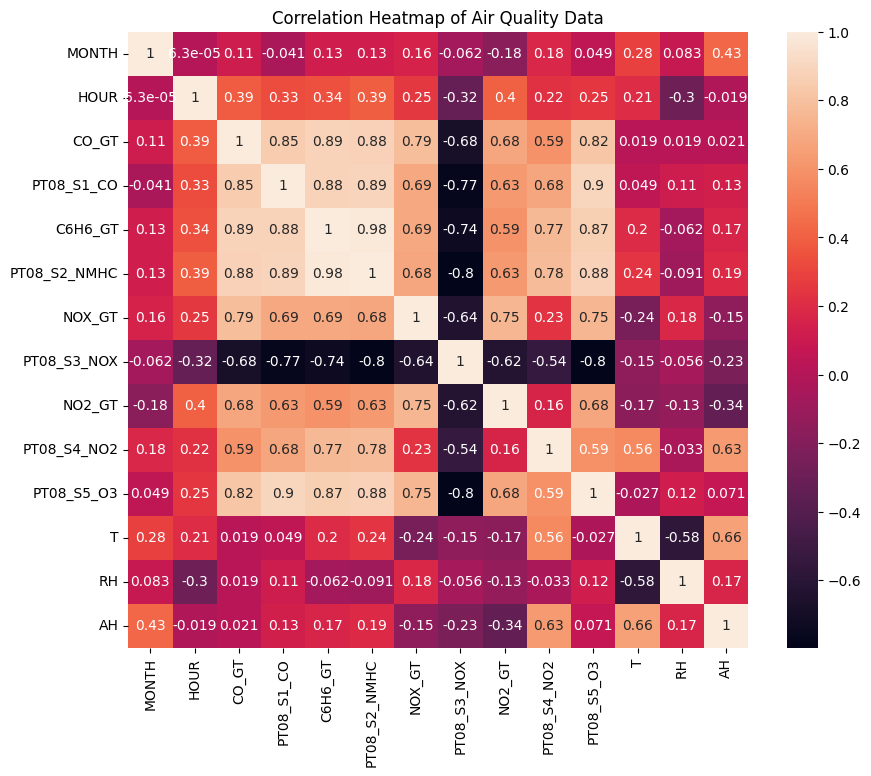

In [5]:
# 🔶 Use a heatmap to explore the correlation between variables only numeric

# I found a useful application of a correlation matrix as heatmap  and adapted it to my values:
# https://stackoverflow.com/questions/39409866/correlation-heatmap

# Calculate the correlation matrix on the numeric columns of df_air:
corr = df_air.select_dtypes('number').corr()

# Plot the heatmap with annotations and a coolwarm color map:
# I want to see it's correlation values so we annotate it.
sns.heatmap(corr, annot=True)
plt.title("Correlation Heatmap of Air Quality Data")
plt.show()


Which conclusions can be drawn from the output? Comment on

- value range
- values on the diagonal
- meaning of the values
- expectations for modeling the data drawn from the correlation matrix

&#x1F536; **Your Answer**: The correlation matrix shows values that range from -1 to 1 and helps us understand which variables are similar or different in behavior.

Value Range:
The numbers go from -1 to 1. A value of 1 means a perfect positive relationship (as one variable increases, so does the other), while -1 means a perfect negative relationship (as one goes up, the other goes down). Values near 0 indicate little to no linear relationship.

Diagonal Values:
The diagonal always shows 1 because every variable is perfectly correlated with itself.

Meaning of the Values:
The values off the diagonal tell us how strongly two different variables are related. For example, a high positive value means that the two variables tend to move together, while a high negative value means they tend to move in opposite directions.

High correlations between predictors (features) may suggest redundancy. This could lead to multicollinearity, which might complicate or bias some models.
Low correlations might mean that the variables provide unique information, which can be beneficial for building a robust model.

2.2 Understand the Degree of Linearity between the Input Features and the Target <span style="color:#4ea373">[1pt]</span>

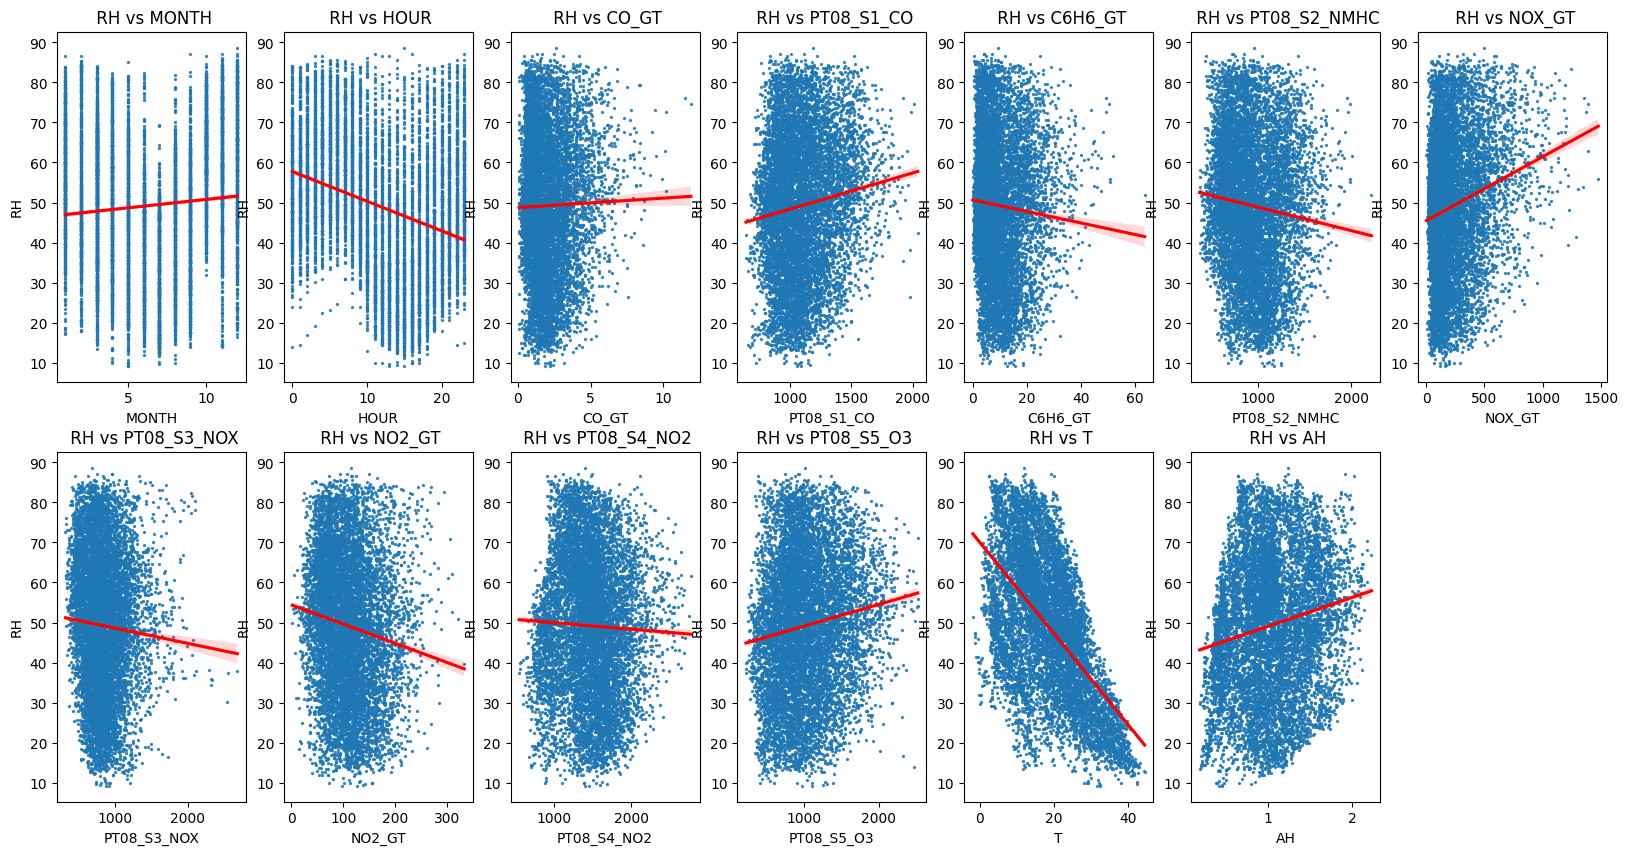

In [6]:
# 🔶 Plot all features (x-axis) against output variable RH (y-axis) in a 2 x 7 grid with `sns.regplot`. (Use a for loop and don't add the plots manually).
# 🔶 Make sure that the regression curve is clearly visible.

# Create a list of features except 'RH'. We could also include the RH vs. RH but it's simply an upward slope.
featuresList = []
for col in df_air.columns:
    if col != 'RH':
        featuresList.append(col)



# "Create a grid of subplots with 2 rows and 7 columns" 
fig, axisArray = plt.subplots(2, 7, figsize=(20, 10))
# Converted 2d into 1d for easier indexing
axisList = axisArray.flatten()

# Loop over each feature and plot it against 'RH'
for i in range(len(featuresList)):
    currentFeature = featuresList[i]
    currentAxis = axisList[i]
    
    # sns-regplot was obtained form the following stackoverflow page to create the right subplots:
    # https://stackoverflow.com/questions/38082602/plotting-multiple-different-plots-in-one-figure-using-seaborn/38091681#38091681
    
    sns.regplot(x=df_air[currentFeature], y=df_air['RH'],
                ax=currentAxis,
                scatter_kws={'s': 2},       # smaller scatter points
                line_kws={'color': 'red'})  # red regression line for clear visibility
    currentAxis.set_title(" RH vs " + currentFeature)

# Removed the extra subplots if there are more subplots than features:
if len(featuresList) < len(axisList):
    for j in range(len(featuresList), len(axisList)):
        fig.delaxes(axisList[j])


plt.show()


Comment on the results. How does the heatplot relate to them?


&#x1F536; **Your Answer**: From the scatter plots we can see which variables have a positive or negative relationship with RH by looking at the slope of the red regression line. For example, Temperature T vs RH has a clear downward slope, that means that when temperature goes up, relative humidity tends to go down. On the other hand, Absolute Humidity AH has a strong upward slope, meaning higher absolute humidity usually comes with higher relative humidity. Other variables show either very weak or no clear linear trend.
A high positive value close to 1  in the heatmap indicaters an upward slope in the scatter plot, while a negative value close to -1 indicates a downward slope. For instance, T has a fairly large negative correlation with RH (around -0.66), and AH has a strong positive correlation (around 0.86). 
Variables that do not show a strong trend in the scatter plots usually have correlation values near zero in the heatmap. 

#### 3. Training Regression Models

3.1. Data Preparations for Training  <span style="color:#4ea373">[1pt]</span>

In [7]:
# 🔶 Define your train and test sets of variables. If you are unsure about the target variable, check the dataset description.

# For X, we drop the RH from the list of variables, and for Y we use that dropped RH:
# Define X as all columns except 'RH'
# Since we drop all the 'RH' for X, our target variable is Y
X = df_air.drop(columns=['RH'])

# Define y as the 'RH' column = TArget variable
y = df_air['RH']

print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

Shape of X: (9017, 13)
Shape of y: (9017,)


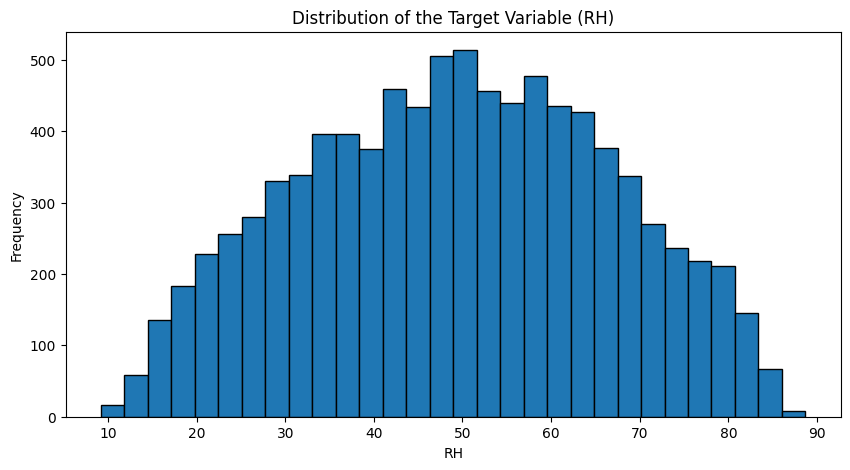

In [8]:
# 🔶 Plot the distribution of the target variable as a histogram
# A normal Histogram with its Frequency
plt.figure(figsize=(10, 5))
plt.hist(y, bins=30, edgecolor='black')
plt.xlabel("RH")
plt.ylabel("Frequency")
plt.title("Distribution of the Target Variable (RH)")
plt.show()

In [9]:
# 🔶 Split the data into training and testing sets using `train_test_split` with a test size of 0.3. Use the random seed 42.

# Documentation for the method:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

# Automatically the train sample becomes 0.7 if we set testsize to 0.3.
# the randon_state is the random seed, the doc says we should use the 'random_state' wording:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('Number of train samples: {}'.format(X_train.shape))
print('Number of test samples: {}'.format(X_test.shape))


Number of train samples: (6311, 13)
Number of test samples: (2706, 13)


In [10]:
# 🔶 Normalize the data using `StandardScaler`. Make sure to use the correct data subsets for the operation and don't forget to use the scaled data for all models.

# Documentation for the method:
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
# Standarcaler is an object, so we create the object variable first and then use it's fit + transformation method for the normalization

# Create StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
# It says that you can do it within one method on the doc, so I use fit_transform
X_train_scaled = scaler.fit_transform(X_train)
#print(X_train_scaled)
X_test_scaled = scaler.transform(X_test)
#print(X_train_scaled)

print('Shape of scaled X_train:', X_train_scaled.shape)
print('Shape of scaled X_test:', X_test_scaled.shape)




Shape of scaled X_train: (6311, 13)
Shape of scaled X_test: (2706, 13)


3.2 Fit Regression Models  <span style="color:#4ea373">[2pt]</span>

We want to train different models in order to find the best performing one. Fit the following models with their standard hyperparamters. Make sure to set the random seed.
- Linear Regression
- Decision Tree Regression
- Random Forest Regression
- Support Vector Machine

Then, predict the RH for the test set and report the RMSE for each of the models

In [11]:
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Support Vector Regression']

def train_pipeline(X_train, y_train, X_test, y_test):

    # For this pipeline we always go over the following order:
    # For each model, we create an instance (e.g., lr for Linear Regression) and train it using the training data. 
    # We then predict the target values on the test data. 
    # Calculate the RMSE using the difference between the true test values and the predicted values.
    # rmse is the dictionary itself so we store each result of the model within models[] in there.
    
    rmse = {}

    # 🔶 Train a linear regression model
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    predicted_lr = lr.predict(X_test)
    rmse['Linear Regression'] = np.sqrt(mean_squared_error(y_test, predicted_lr))

    # 🔶 Train a decision tree regression model
    dt = DecisionTreeRegressor(random_state=42)
    dt.fit(X_train, y_train)
    predicted_dt = dt.predict(X_test)
    rmse['Decision Tree'] = np.sqrt(mean_squared_error(y_test, predicted_dt))

    # 🔶 Train a random forest regression model
    rf = RandomForestRegressor(random_state=42)
    rf.fit(X_train, y_train)
    predicted_rf = rf.predict(X_test)
    rmse['Random Forest'] = np.sqrt(mean_squared_error(y_test, predicted_rf))

    # 🔶 Train a support vector regression model
    svr = SVR()
    svr.fit(X_train, y_train)
    predicted_svr = svr.predict(X_test)
    rmse['Support Vector Regression'] = np.sqrt(mean_squared_error(y_test, predicted_svr))

    return rmse, [lr, dt, rf, svr]

# Train models and compute RMSE
rmse, baseline_models = train_pipeline(X_train_scaled, y_train, X_test_scaled, y_test)

# Display RMSE of all models
print('RMSES')
print(pd.DataFrame(rmse.items(), columns=['Model', 'RMSE']))

RMSES
                       Model      RMSE
0          Linear Regression  5.908870
1              Decision Tree  1.360056
2              Random Forest  0.633933
3  Support Vector Regression  3.760667


Comment on the results.
- Which model would you pick.
- Is the outcome surprising or did you assume a similar model ranking given your knowledge about the models?

&#x1F536; **Your Answer**: 
- Random Forest was better than the other models. The RMSE value that we see is the difference between the true test values and the predicted values, like i have mentioned above. It means its predictions were closest to the actual RH values. In that case, I would pick the Random Forest model.
- This outcome isn’t too surprising. In many real-world datasets, the Random Forest model often does well because it combines many decision trees and can capture non-linear relationships better than a simple linear model.
I think the reason for SVR to have struggled a bit is because the data wasn't perfectly scaled for its usage. But the worst performance came from the Linear Regression, reason for that is that we have non-linearity in our features with rh, that's why Linear Regression performs the worst. And with non-linearity, I mean that the relationships between features and the target RH are non-linear.

3.3. Feature Engineering  <span style="color:#4ea373">[1.5pt]</span>

The choice of input features can impact model performance drastically. Let's try to improve our baselines by choosing a different set of input features.



In [12]:
# 🔶 Write function to measure RMSE with different combinations of features.
def train_test_RMSE(df_air, feat_, feat_name):
    """
    The function train_test_RMSE returns the RMSE for different combinations
    of features feat_ of the dataframe df_air.

        :param df_air: (pandas.DataFrame) Our dataset
        :param feat_: (List[str]) A list of column names
        :param feat_name: (str) A string with the name of the feature combination
        :return: (float) The RMSE score value
    """
    X_ = df_air[feat_]
    y_ = df_air['RH']
    # Splitting the data into training and testing sets again(70% train, 30% test)
    X_train_, X_test_, y_train_, y_test_ = train_test_split(X_, y_, test_size=0.3, random_state=42)
    
    # For each model we once again need their rmse scores from the pipeline

    rmse, _ = train_pipeline(X_train_, y_train_, X_test_, y_test_)
    rmse = pd.DataFrame(rmse.items(), columns=['Model', 'RMSE'])
    rmse['Features'] = feat_name

    return rmse

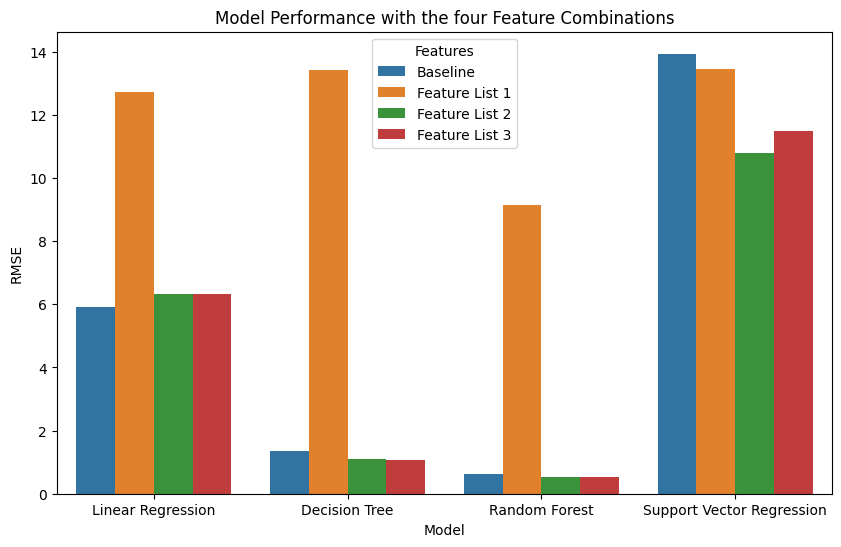



                       Model       RMSE        Features
0          Linear Regression   5.908870        Baseline
1              Decision Tree   1.359060        Baseline
2              Random Forest   0.633657        Baseline
3  Support Vector Regression  13.936954        Baseline
0          Linear Regression  12.718910  Feature List 1
1              Decision Tree  13.435040  Feature List 1
2              Random Forest   9.155401  Feature List 1
3  Support Vector Regression  13.449663  Feature List 1
0          Linear Regression   6.323933  Feature List 2
1              Decision Tree   1.111953  Feature List 2
2              Random Forest   0.515670  Feature List 2
3  Support Vector Regression  10.778426  Feature List 2
0          Linear Regression   6.332755  Feature List 3
1              Decision Tree   1.054180  Feature List 3
2              Random Forest   0.520679  Feature List 3
3  Support Vector Regression  11.492902  Feature List 3




In [13]:
# 🔶 Train the models with 3 different combinations of inputs.

# Define the baseline as all available features (the target 'RH' is not included in X)
baseline = X.keys()[:]

# Define three different feature lists:
# Feature List 1 -> Use only the sensor measurements 
feature_list1 = ['CO_GT', 'PT08_S1_CO', 'C6H6_GT', 'PT08_S2_NMHC', 
                 'NOX_GT', 'PT08_S3_NOX', 'NO2_GT', 'PT08_S4_NO2', 'PT08_S5_O3']

# Feature List 2 -> Use only the time variables
feature_list2 = ['MONTH', 'HOUR', 'T', 'AH']

# Feature List 3 -> Use a smaller set of key variables like a mix of sensor and meteorological
feature_list3 = ['CO_GT', 'T', 'AH']

# Combine them:
feature_lists = [baseline, feature_list1, feature_list2, feature_list3]
feature_names = ['Baseline', 'Feature List 1', 'Feature List 2', 'Feature List 3']

# Calculate RMSE for each feature combination using our previously defined function
rmse = pd.concat([train_test_RMSE(df_air, feat_, name) for feat_, name in zip(feature_lists, feature_names)])



# 🔶 Provide a performance overview of our baseline and the three different feature combinations for all four models. Make a barplot with x = Model, y = RMSE, hue = Features

# Barplot to compare model performance for each feature combination:
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='RMSE', hue='Features', data=rmse)
plt.title("Model Performance with the four Feature Combinations")
plt.xlabel("Model")
plt.ylabel("RMSE")
plt.show()

print("\n")
print(rmse)
print("\n")



Comment on the results

- Is the optimal set of features the same for all models?
- Is there a relationship between the score and the heatmap in the previous lab? If so, why?

&#x1F536; **Your Answer**:
- Each model responds differently to the various feature combinations. For example, a simpler model like Linear Regression probably performs best with a smaller set of the most relevant features, especially if some variables are strongly correlated. It even performs better if linearity within the features exists. Decision tree and random forests work well with larger number of features. Depending on if they use their greedy-method or elimination method, they can eliminate the unuseful features, and keep the ones that matter the most. So depending on feature size and property, the best-performing feature set can vary from one model to another.
- I think you mean the heatmap in the previous example? The heatmap showed how strongly each feature in the dataset correlates with the target (RH) and with other features. Features thta have a high correlation with RH tended to be more informative for modelling and lowered the RMSE score. Just because some features are strongly correlated doesn’t mean they automatically produce the best performance in every model. Random Forest can handle non-performing features that are meant to be eliminated in its own process, or correlated variables, while Linear Regression might get messed up if there’s too much overlap among features.

3.4. Hyperparameter Tuning.  <span style="color:#4ea373">[1pt]</span>

The performance of a model does not only depend on the set of input features but also on the choice of hyperparameters that define the model. Ensemble models like random forests have especially many hyperparameters do choose. Let's make an informed choice by exploring different combinations of hyperparameters and evaluating their performance with `GridSearchCV`.

- use different numbers of estimators
- use cv of 5 or 10
- use the correct scoring function
- then, use the best model hyperparameters to predict on the test data

In [14]:
# 🔶 Your answer
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html\
# https://www.geeksforgeeks.org/performing-feature-selection-with-gridsearchcv-in-sklearn/
# cv of 5 means 5-fold crosss-validation. I want to use only 2-cores of CPU so i will set the n_jobs to two.
# I will set the number of trees as different estimators, and the depth of my tree will be different as well.
# It says do it for 5 and 10, so i will do both to make sure, within a loop.

param_grid = {
    'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 10]
}

# Createt a RandomForestRegressor with sane fixed random state for reproducibility:
rf = RandomForestRegressor(random_state = 42)

# We will use negative mean squared error as the scoring method
# because GridSearchCV always tries to maximize the score.
# Using "neg_mean_squared_errorr" is equivalent to minimizing MSE.
scoring_method = 'neg_mean_squared_error'

# List of cv values we want to try are:

# cv_values = [5, 10] -> This one takes way too long, so if i really have to do it i'd do it but the 
# result doesn't change that much anyways.

cv_values = [5]

for cv in cv_values:
    print("Performing Grid Search with {}-fold cross-validation... Please wait a bit.".format(cv))

    # Use GridSearchCV to try all combinations of the hyperparameters
    # Set up GridSearchCV with the current cv value (we're are doing both 5 and 10 fold) and verbose=2 for detailed output
    grid_search = GridSearchCV(estimator=rf,
                               param_grid=param_grid,
                               scoring=scoring_method,
                               cv=cv,         # current cv value (5 or 10), 10 messes up my laptop
                               n_jobs=2,
                               verbose=2)

    # Note for self: y was not scaled as x, y scaling is best practice, but if you scale both, then you need to reverse it to 
    # obtain real outpout, too cumbersome. If you decide to do it, reversal has to take place within the pipeline
    # Fit the grid search on the scaled training data
    grid_search.fit(X_train_scaled, y_train.values.ravel())
    
    # Search for the best model and its hyperparameters
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # Print the best hyperparams
    print("Best hyperparameters (cv={}): {}".format(cv, best_params))
    
    # Use the best model to predict on the scaled test data.
    predictions = best_model.predict(X_test_scaled)
    
    # Calculate RMSE on the testing set.
    rmse_val = np.sqrt(mean_squared_error(y_test, predictions))
    print("Test RMSE (cv={}): {:.3f}".format(cv, rmse_val))

    print("\n")
    print("-----------------------------------------------------\n")

# Now print the RMSE of all previous models (we stored them all in the rmse), but in the end we look at baseline anyways, but
# as a comparison it's nice to list them all:
print("\nRMSE of all previous models:")
print(rmse)





Performing Grid Search with 5-fold cross-validation... Please wait a bit.
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best hyperparameters (cv=5): {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Test RMSE (cv=5): 0.620


-----------------------------------------------------


RMSE of all previous models:
                       Model       RMSE        Features
0          Linear Regression   5.908870        Baseline
1              Decision Tree   1.359060        Baseline
2              Random Forest   0.633657        Baseline
3  Support Vector Regression  13.936954        Baseline
0          Linear Regression  12.718910  Feature List 1
1              Decision Tree  13.435040  Feature List 1
2              Random Forest   9.155401  Feature List 1
3  Support Vector Regression  13.449663  Feature List 1
0          Linear Regression   6.323933  Feature List 2
1              Decision Tree   1.111953  Feature List 2
2              Random Forest   0.515670  Fea

What are your conclusions regarding the Grid Search method. Did the performance improve? If not, what could be the reason?

&#x1F536; **Your Answer**: I don't really see any improvement. The Random forest RMSE was already around that output region, and now its 0.609 for cv = 5.
So the change between baseline and the Grid Search method is very minimal. That means there was no significant boost. The data may have limitations such as noise, or variability, so either way, even when we choose the better model, we cannot change the data. So we were near perfect anyways in our RMSE for Random Forest baseline. We need to adreess data-quality issues. 

3.5. Discretized Error Assessment <span style="color:#4ea373">[2pt]</span>

Let's investigate the performance of the random forest further. Use your random forest model obtained from the grid search.

- Plot the box plots of **absolute** errors vs output range.
- Discretize the output variable RH into three intervals of your choice.
- Calculate the errors for each sample in the intervals.
- Use `sns.boxplot` to plot the errors per interval.

/Users/alihankaratasli/Desktop/FS25/Machine_Learning/Labs/ml4s/lib/python3.12/site-packages/seaborn/categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


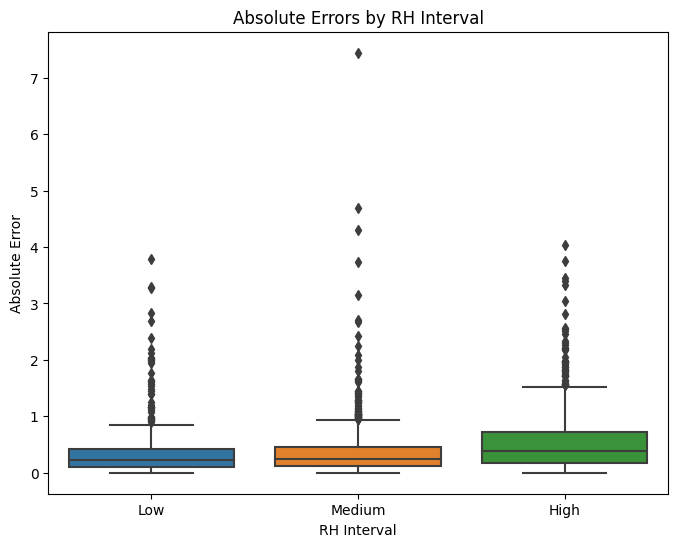

In [15]:
# 🔶 Your answer
# Use the best model from the gridsearch, it's within the best_model and then make predictions on the scaled test set:d
predictions = best_model.predict(X_test_scaled)

# Calculate the absolute error for each sample:
absolute_errors = np.abs(predictions - y_test)

# Discretize the RH values into three intervals: Low, Medium, High
# Created three evenly spaced bins between the min and max of y_test.
bins = np.linspace(y_test.min(), y_test.max(), 4)
labels = ['Low', 'Medium', 'High']

# Use pd.cut to assign each y_test value to an interval
RH_intervals = pd.cut(y_test, bins=bins, labels=labels, include_lowest=True)

# Create a DataFrame with the intervals and corresponding absolute errors
error_df = pd.DataFrame({'RH_Interval': RH_intervals, 'AbsoluteError': absolute_errors})

# Plot the box plots of absolute errors per RH interval
plt.figure(figsize=(8, 6))
sns.boxplot(x='RH_Interval', y='AbsoluteError', data=error_df)
plt.title('Absolute Errors by RH Interval')
plt.xlabel('RH Interval')
plt.ylabel('Absolute Error')
plt.show()

***

#### Classification

**Task Description**

We will work with a new dataset for solving a classification task. The new task is to classify the forest cover type given a set of variables describing the environmental surrounding of a location.

## Dataset: Forest cover data
This dataset contains 581012 tree observations from four areas of the Roosevelt National Forest in Colorado. All observations are cartographic variables (no remote sensing) from 30 meter x 30 meter sections of forest.

This dataset includes information on tree type, shadow coverage, distance to nearby landmarks (roads etcetera), soil type, and local topography.

<center>

|Sl No| Attribute| Description|
|-| -| -|
|0| Elevation| Elevation in meters|
|1| Aspect| Aspect in degrees azimuth|
|2| Slope| Slope in degrees|
|3| Horizontal_Distance_To_Hydrology|Horizontal distance to nearest surface water features|
|4| Vertical_Distance_To_Hydrology|Vertical distance to nearest surface water features|
|5| Horizontal_Distance_To_Roadways| Horizontal distance to nearest roadway|
|6| Hillshade_9am| Hill shade index at 9am, summer solstice. Value out of 255|
|7| Hillshade_Noon| Hill shade index at noon, summer solstice. Value out of 255|
|8| Hillshade_3pm| Hill shade index at 3pm, summer solstice. Value out of 255|
|9| Horizontal_Distance_To_Fire_Points| Horizontal distance to nearest wildfire ignition points|
|10| Wilderness_Area1| Rawah Wilderness Area|
|11| Wilderness_Area2| Neota Wilderness Area|
|12| Wilderness_Area3| Comanche Peak Wilderness Area|
|13| Wilderness_Area4| Cache la Poudre Wilderness Area|
|14| Soil_Type1 ... Soil_Type40| 40 different Soil Types|
|15| Cover Type| Forest Cover Type designation. Integer value between 1 and 7|

</center>

**Cover Types:**

1. Spruce/Fir
2. Lodgepole Pine
3. Ponderosa Pine
4. Cottonwood/Willow
5. Aspen
6. Douglas-fir
7. Krummholz

#### 1. Prepare the Dataset <span style="color:#4ea373">[0t]</span>

Repeat the data preparation steps from before:
- read the dataset file
- look at the first 5 rows to check if the reading was successful
- check if there are NaN values and drop the respective rows if needed



In [16]:
# 🔶 Read the dataset and show the first 5 rows
df_forest = pd.read_csv('data/ForestCover.csv')
print("First 5 rows of the dataset:")
print(df_forest.head())

# 🔶 Check if there are any missing values
print("\nMissing values per column:")
print(df_forest.isnull().sum())

# 🔶 Remove rows with NaN values if needed
print("\nShape of the dataset before dropping NaN rows:", df_forest.shape)
df_forest = df_forest.dropna()

# Print the shape of the dataset after dropping rows with NaN values
print("\nShape of the dataset after dropping NaN rows:", df_forest.shape)

First 5 rows of the dataset:
   Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2     

#### 2. Explore the Dataset <span style="color:#4ea373">[1.5pt]</span>


2.1. Visualize the target label distribution  <span style="color:#4ea373">[0.5pt]</span>



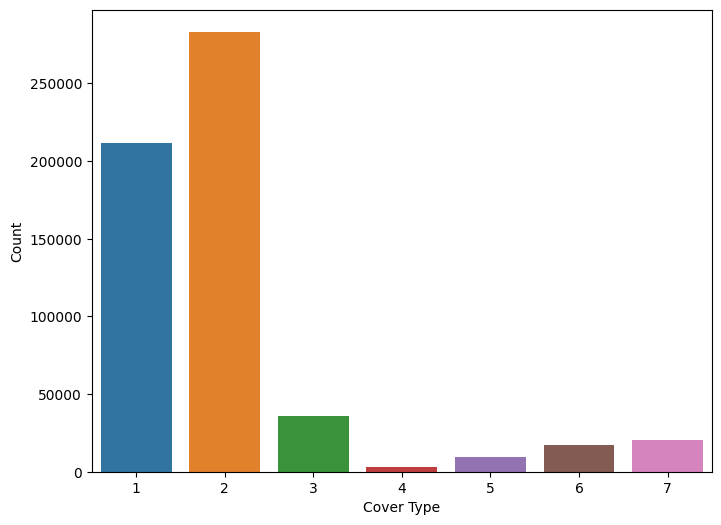

In [17]:
# 🔶 plot the number of samples per covertype by using sns.countplot

# https://www.geeksforgeeks.org/countplot-using-seaborn-in-python/

plt.figure(figsize=(8, 6))
sns.countplot(x="Cover_Type", data=df_forest)
plt.xlabel("Cover Type")
plt.ylabel("Count")
plt.show()


2.2 Explore the data distribution per feature per target class.  <span style="color:#4ea373">[1pt]</span>




First 12 features to plot: ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Wilderness_Area2']


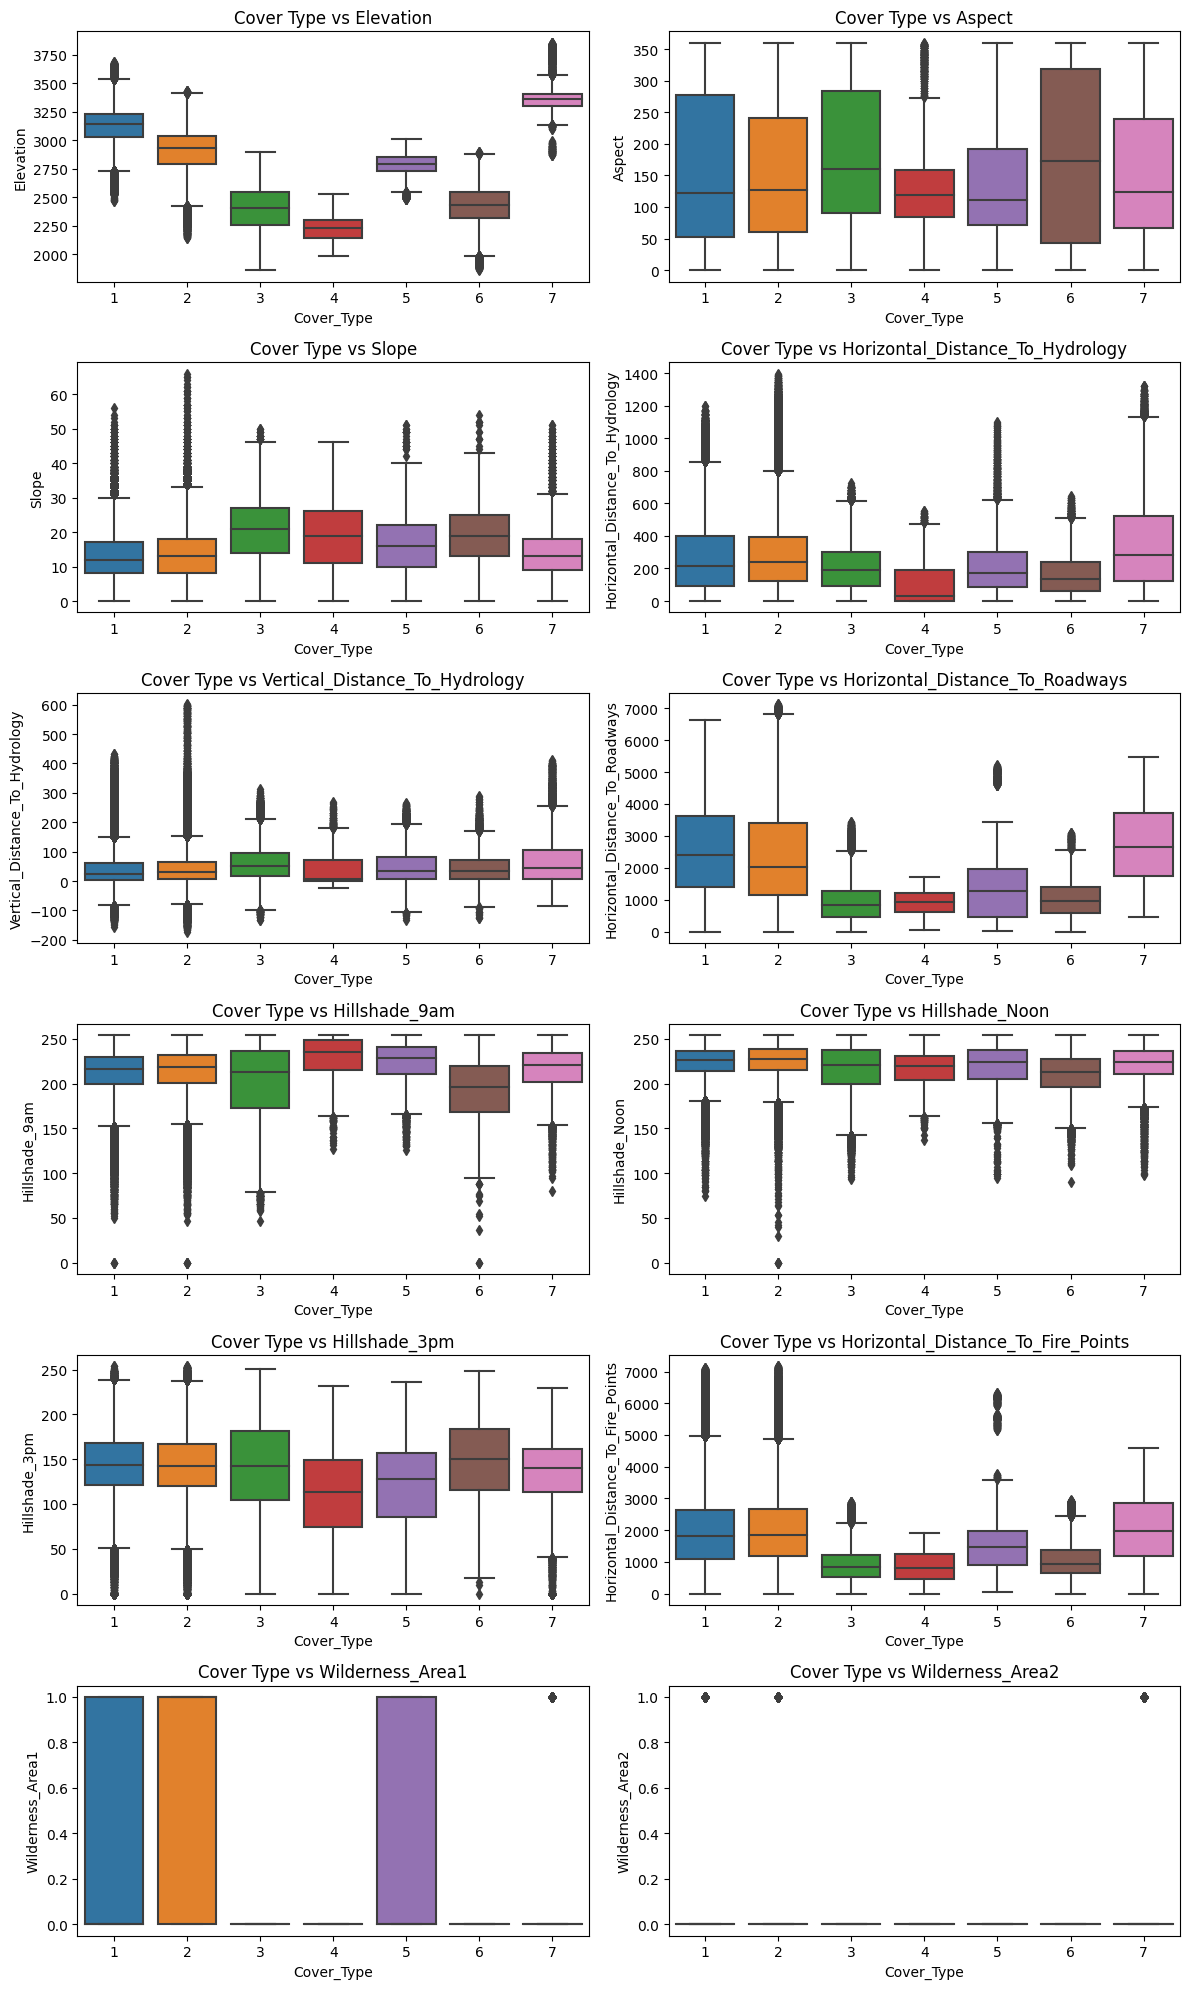

In [18]:
# 🔶 make a boxplot for the first 12 features where you plot the cover type against the feature values.
# 🔶 Use a loop and arrange the plots in a 5 x 2 grid

# I think it's meant to be a 6x2 grid in the description. We have 12 features.
# I could simply make the subplot to 5,2 and make sure i only include 10 in my list, then we'd have the 5x2 grid,
# yet i'm leaving it this way to show the 12 plots, even tho the last one is depricated

# Get the names of the first 12 features (assumed to be in the order they appear in the DataFrame)
first_12_features = list(df_forest.columns[:12])
print("First 12 features to plot:", first_12_features)

# Create a grid of subplots with 6 rows and 2 columns (6 x 2 = 12 plots)
fig, axes = plt.subplots(6, 2, figsize=(12, 20))  # 12 subplots total

# Flatten the array of axes so we can loop through them easily
axes = axes.flatten()

# Loop through each of the 12 features and create a boxplot for each
for i, feature in enumerate(first_12_features):
    sns.boxplot(x="Cover_Type", y=feature, data=df_forest, ax=axes[i])
    axes[i].set_title(f"Cover Type vs {feature}")

plt.tight_layout()
plt.show()


Comment on the results.

- which features do you expect to be important for high classification accuracy

&#x1F536; **Your Answer**: Some of the medians are very near to each other, thus some of the graphs cannot be correlated. Features with low within-class variance tend to contribute to high classification performance as well.
Out of all the features, I think Elevation, the distance features, and the Wilderness_Area indicators to be quite important for achieving high classification accuracy, because they show the most pronounced differences among cover types.

#### 3. Model Training <span style="color:#4ea373">[2pt]</span>

Train the classification models on the first 10 features

- Make sure to prepare the data correctly
- Train a Logistic Regression Model
- Train a Decision Tree Model
- Train a Random Forest Classifier
- Train a K Nearest Neighbor Model

Report the Accuracy on the test set for each of the models



In [19]:
# 🔶 Your answer

# We select the first 10 features (columns 0 through 9) as X
X = df_forest.iloc[:, :10]
y = df_forest['Cover_Type']

# Split into train and test sets with same parameter numbers we used in the prev tasks
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler() # As object
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) # only transform

# Hyperparameters should be set:
models = {
    "Logistic Regression": LogisticRegression(max_iter = 1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier()
}

# "Report the Accuracy on the test set for each of the models"
accuracy_results = {}
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[model_name] = accuracy

print("Accuracy on the test set for each model:")
for model_name, acc in accuracy_results.items():
    print(f"{model_name}: {acc:.3f}")


Accuracy on the test set for each model:
Logistic Regression: 0.696
Decision Tree: 0.914
Random Forest: 0.948
KNN: 0.899


Comment on the results.
- Which model would you pick.
- Is the outcome surprising or did you assume a similar model ranking given your knowledge about the models?

&#x1F536; **Your Answer**:

#### 4. Dealing with imbalanced data<span style="color:#4ea373">[3pt]</span>


An imbalanced classification problem is an example of a classification problem where the distribution of examples across the known classes is biased or skewed. The distribution can vary from a slight bias to a severe imbalance where there is one example in the minority class against hundreds, thousands, or millions of examples in the majority class or classes.

Imbalanced classifications pose a challenge for predictive modeling as most of the machine learning algorithms used for classification were designed around the assumption of an equal number of examples for each class. This results in models that have poor predictive performance, specifically for the minority class. This is a problem because typically, the minority class is more important and therefore the problem is more sensitive to classification errors for the minority class than the majority class.

A commonly used strategy for counterbalancing the dataset is resampling. There are two main methods that you can use to even-up the classes:

1. You can add copies of instances from the under-represented class called over-sampling (or more formally sampling with replacement)
2. You can delete instances from the over-represented class, called under-sampling.

Let's retrain the Random Forest classifiers with both under-sampled data and over-sampled data, and compare their accuracy scores.

4.1. Undersampling <span style="color:#4ea373">[1pt]</span>

In [20]:
# https://machinelearningmastery.com/what-is-imbalanced-classification/
# better understanding

# 🔶 print the size of the smallest class
counts = df_forest["Cover_Type"].value_counts()
smallest = counts.min()
print("Smallest class size:", smallest)

Smallest class size: 2747


In [21]:
# 🔶 Undersample all the majority classes so that all classes have the same cardinality.
# for each cover type, take 'smallest' samples:

undersampled_list = []
for cover, group in df_forest.groupby("Cover_Type"):
    sample = group.sample(n=smallest, random_state=42)
    undersampled_list.append(sample)
# Concatinate the samples back into one DataFrame:
df_under = pd.concat(undersampled_list)

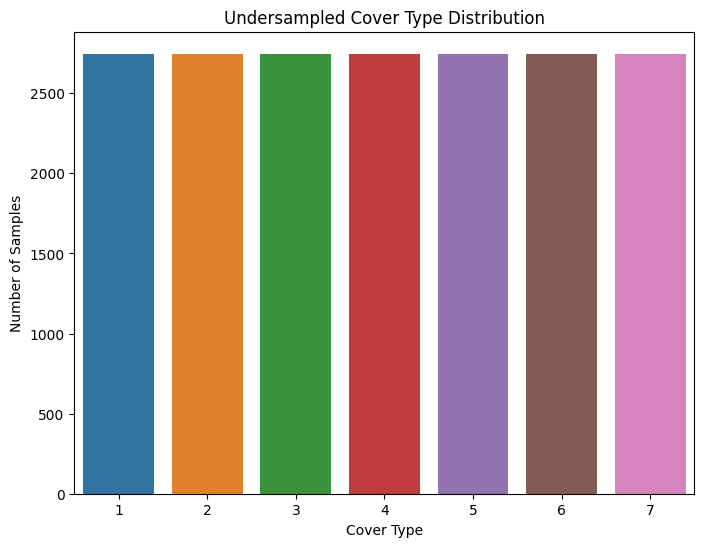

In [22]:
# 🔶 plot the number of samples per covertype
plt.figure(figsize=(8, 6))
sns.countplot(x="Cover_Type", data=df_under)
plt.title("Undersampled Cover Type Distribution")
plt.xlabel("Cover Type")
plt.ylabel("Number of Samples")
plt.show()

In [23]:
# 🔶 Fit a new Random Forest Classifier for this data subset and print it's performance.
# 🔶 (Hint: Don't forget to prepare the data correctly)

X = df_under.drop("Cover_Type", axis=1)
y = df_under["Cover_Type"]

# Split the data into train and test sets again, data has been prepared through this
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42, stratify=y)

rf = RandomForestClassifier(n_estimators=10, random_state=42)
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print("Random Forest Accuracy on undersampled data: {:.6f}".format(accuracy))

Random Forest Accuracy on undersampled data: 0.831513


4.2 Oversampling <span style="color:#4ea373">[2pt]</span>

Repeat the procedure but this time oversample the underrepresented classes.

The largest class has 283301 samples.


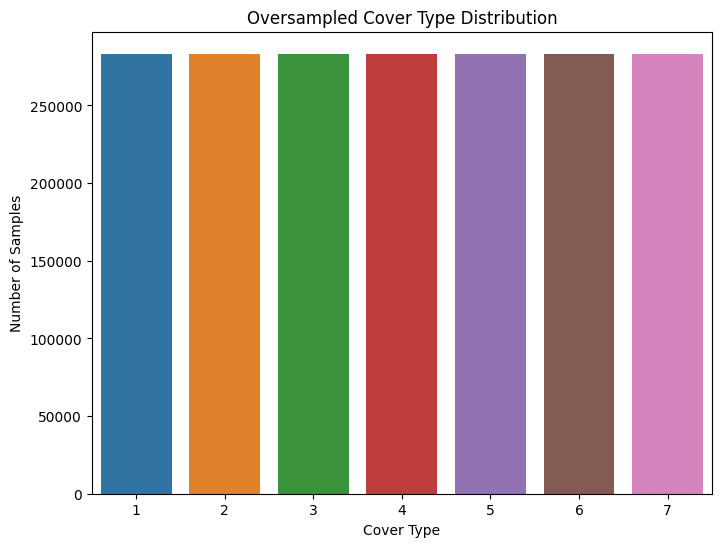

Random Forest Accuracy on oversampled data: 0.9920


In [24]:
# Use the code above for underfitting

# 🔶 print the size of the largest class
counts = df_forest["Cover_Type"].value_counts()
largest = counts.max()
print("The largest class has", largest, "samples.")


# 🔶 Oversample all the majority classes so that all classes have the same cardinality.
oversampled_list = []
for cover, group in df_forest.groupby("Cover_Type"):
    sample = group.sample(n=largest, replace=True, random_state=42)
    oversampled_list.append(sample)
df_over = pd.concat(oversampled_list)

# 🔶 plot the number of samples per covertype
plt.figure(figsize=(8,6))
sns.countplot(x="Cover_Type", data=df_over)
plt.title("Oversampled Cover Type Distribution")
plt.xlabel("Cover Type")
plt.ylabel("Number of Samples")
plt.show()


# Use all columns except 'Cover_Type' as features, and 'Cover_Type' as the target
X_over = df_over.drop("Cover_Type", axis=1)
y_over = df_over["Cover_Type"]

# Split the oversampled data into training and testing sets (70% train, 30% test)
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(
    X_over, y_over, test_size=0.3, random_state=42, stratify=y_over
)

# 🔶 Fit a new Random Forest Classifier for this data subset and print it's performance.
# 🔶 (Hint: Don't forget to prepare the data correctly)
rf_over = RandomForestClassifier(n_estimators=10, random_state=42)
rf_over.fit(X_train_over, y_train_over)
predictions_over = rf_over.predict(X_test_over)

accuracy_over = accuracy_score(y_test_over, predictions_over)
print("Random Forest Accuracy on oversampled data: {:.4f}".format(accuracy_over))

Comment on the results. Does one method clearly outperform the other? If so, can you think of a reason for that?

&#x1F536; **Your Answer**:
The oversampled model achieved an extremely high accuracy of 99.20% which is a strong improvement over what we saw with undersampling. This suggests that, in this case, oversampling helped balance the classes without losing any data from the majority classes.
By oversampling, we duplicated examples from the underrepresented classes so that every class had as many samples as the largest class. This allowed the model to learn from more examples of the minority classes without discarding any data from the majority classes. 
But in general, we have to be careful with oversampling, so that it doesn't lead to overfit.